# International-Debt-Statistics

GitHub Repository: https://github.com/skhiearth/International-Debt-Statistics

Analysing about international debt using data from International Monetary Fund. Partly inspired by the 'Analyze International Debt Statistics' project on DataCamp by Sayak Paul. 

The data used is provided by [International Monetary Fund](https://www.imf.org/external/datamapper/CG_DEBT_GDP@GDD/CHN/FRA/DEU/ITA/JPN/GBR/USA). It contains debt statistics for several countries across the globe as recorded from 1950 to 2018.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Read the XLS
df = pd.read_csv('Dataset/imf-debt.csv', na_values = 'no data')
df.head(3)

,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.247261,7.709434,7.512624,6.769370,6.914434,8.700291,9.144177,7.823194,7.452149,6.894410
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.670180,57.710251,59.399812,62.119953,65.529876,70.025578,72.670025,72.375941,70.091619,68.044939


In [2]:
df.drop(df.index[0], inplace = True)
df.head(2)

,Central Government Debt (Percent of GDP),1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.247261,7.709434,7.512624,6.769370,6.914434,8.700291,9.144177,7.823194,7.452149,6.894410
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.670180,57.710251,59.399812,62.119953,65.529876,70.025578,72.670025,72.375941,70.091619,68.044939


In [3]:
# Converting dataframe from wide to tall
df2 = df.reset_index()
cols = list(df2.columns[2:])
time_series = pd.melt(df2, id_vars='Central Government Debt (Percent of GDP)', value_vars=cols)
time_series.tail()

,Central Government Debt (Percent of GDP),variable,value
12139,Yemen,2018,64.752349
12140,Zambia,2018,78.109917
12141,Zimbabwe,2018,37.057447
12142,NaN,2018,NaN
12143,"©IMF, 2019",2018,NaN


In [4]:
# Rename columns
time_series.rename(columns = {'Central Government Debt (Percent of GDP)':'Debt'}, inplace = True) 

# Dropping redunant rows
filtered_df = time_series[time_series['Debt'].notnull()]
filtered_df = filtered_df[:-1]

filter = ['1950', '1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990',
         '1995', '2000', '2005', '2010', '2015', '2018'] 

filtered_df = filtered_df[filtered_df['variable'].isin(filter)] 

print(filtered_df.shape)
filtered_df.tail()

(2624, 3)


,Debt,variable,value
12137,Vietnam,2018,NaN
12138,West Bank and Gaza,2018,36.621482
12139,Yemen,2018,64.752349
12140,Zambia,2018,78.109917
12141,Zimbabwe,2018,37.057447


In [5]:
# Selected Countries
countries = ["India", "United States", "Switzerland", "Germany", "United Kingdom", "France"]
select_countries = filtered_df[filtered_df['Debt'].isin(countries)]

# Rename columns
select_countries.rename(columns = {'Debt': 'Country'}, inplace = True) 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


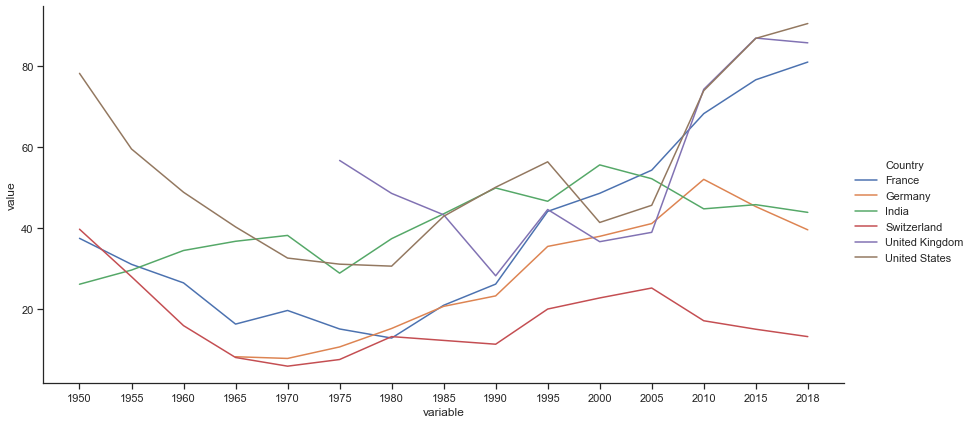

In [6]:
sns.relplot(x = "variable", y = "value", data = select_countries, 
            hue = "Country", kind = "line", height = 6, aspect = 2.0)

Text(0.5, 0.98, 'Regression models fitted to the change in Central Government Debt of Selected Countries')

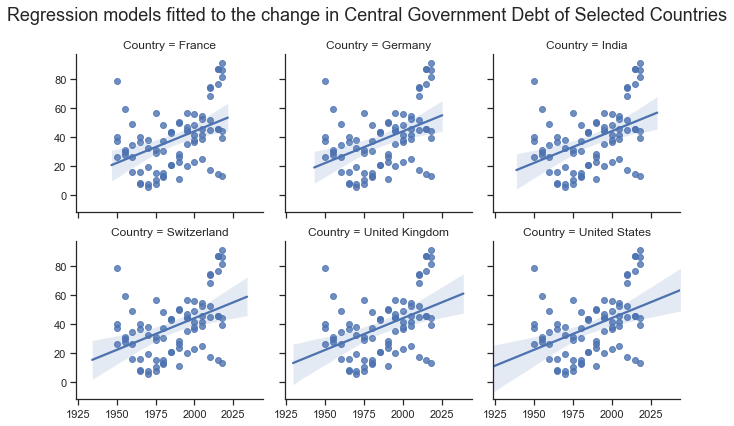

In [7]:
# Creating the Facet Grid
facet = sns.FacetGrid(select_countries, col= "Country", col_wrap=3, height = 3)
facet.map(sns.regplot, x = select_countries.variable.values.astype(int), 
      y = select_countries.value.values.astype(float))

# Adding supertitle
plt.subplots_adjust(top=0.87)
supertitle = "Regression models fitted to the change in Central Government Debt of Selected Countries"
facet.fig.suptitle(supertitle, size=18)

In [8]:
# Choropleth Map
import geopandas as gpd
shapefile = 'dataset/countries_110m/ne_110m_admin_0_countries.shp'

# Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns
gdf.columns = ['Country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # Row corresponding to Antarctica
gdf.at[4,'Country']='United States'
gdf.at[18,'Country']='Russian Federation'
gdf.head(5)

,Country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [9]:
# Static Choropleth for 2018
df_2018 = filtered_df[filtered_df['variable'] == '2018']
df_2018.head()

# Merging GDF with df_2018
merged = gdf.merge(df_2018, left_on = 'Country', right_on = 'Debt', how = 'left')
merged.value.fillna('No data', inplace = True)
merged.head()

,Country,country_code,geometry,Debt,variable,value
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2018,46.1547
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,No data
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,No data
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2018,36.6253
4,United States,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2018,90.4975


In [10]:
import json

# Read data to json.
merged_json = json.loads(merged.to_json())
# Convert to String-like object
json_data = json.dumps(merged_json)

In [11]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

# Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

# Dark blue is highest debt percentage.
palette = brewer['YlGnBu'][8]
palette = palette[::-1]

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 85, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', 
               '25':'25%', '30':'30%','35':'35%', '40': '40%',
               '50':'50%', '55':'55%','60':'60%', '65': '65%',
               '70':'70%', '75':'75%','80':'80%', '85': '>85%',}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, 
                     height = 20, border_line_color=None,location = (0,0), 
                     orientation = 'horizontal', major_label_overrides = tick_labels)

p = figure(title = 'Central Government Debt (Percent of GDP), 2018', plot_height = 550 , 
           plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

# Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'value', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

output_notebook()
show(p)

Loading BokehJS ...